# Recommendation Systems
1. Recommender systems are a hot topic. Recommendation systems can be formulated as a task of matrix completion in machine learning. Recommender systems aim to predict the rating that a user will give for an item (e.g., a restaurant, a movie, a product).

2. Download the movie rating dataset from: https://www.kaggle.com/rounakbanik/themovies-dataset. These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

3. Building a small recommender system with the matrix data: “ratings.csv”. You can use the recommender system library: Surprise (http://surpriselib.com), use other recommender system libraries, or implement from scratches.

    1.  Read data from “ratings.csv” with line format: 'userID movieID rating timestamp'.
    2. MAE and RMSE are two famous metrics for evaluating the performances of a recommender system. The definition of MAE can be found via: https://en.wikipedia.org/wiki/Mean_absolute_error. The definition of RMSE can be found via: https://en.wikipedia.org/wiki/Root-mean-square_deviation.
    3. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering,under the 5-folds cross-validation
    4. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data?
    5. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?
    6. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.
    7. Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict
from surprise import KNNBasic, SVD
from surprise import Dataset, Reader
from surprise.accuracy import mae, rmse
from surprise.model_selection import KFold

In [3]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
ratings_data = Dataset.load_from_file("data/ratings_small.csv", reader=reader)

In [4]:
ratings_data

### Model training with K-fold cross validation accuracy

In [5]:
def cross_validate_model(model, n_splits=5):
    # define a cross-validation iterator
    kf = KFold(n_splits, random_state=123)

    indexes = ["Split "+str(x+1) for x in range(n_splits)] + ["AVG"]
    accuracy = pd.DataFrame(index=indexes, columns=["RMSE", "MAE"])
    index = 1
    for trainset, testset in kf.split(ratings_data):

        # train and test algorithm.
        model.fit(trainset)
        predictions = model.test(testset)

        # Compute and print Root Mean Squared Error
        accuracy["RMSE"]["Split "+str(index)] = rmse(predictions, verbose=False)
        accuracy["MAE"]["Split "+str(index)] = mae(predictions, verbose=False)
        index += 1

    accuracy["RMSE"]["AVG"] = accuracy["RMSE"][:-1].sum() / n_splits
    accuracy["MAE"]["AVG"] = accuracy["MAE"][:-1].sum() / n_splits
    return accuracy

### Average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation

In [6]:
models = {"User CF": KNNBasic(sim_options={'user_based':True}, verbose=False),
          "Item CF": KNNBasic(sim_options={'user_based':False}, verbose=False),
          "PMF": SVD(biased=False)}

model_results = {}
for model_name, model in models.items():
    print("\nBuilding", model_name , "...")
    model_results[model_name] = cross_validate_model(model, n_splits=5)
    print("Done with", model_name , "...")
                               


Building User CF ...
Done with User CF ...

Building Item CF ...
Done with Item CF ...

Building PMF ...
Done with PMF ...


In [7]:
for model, result in model_results.items():
    print("\n\nCross validation accuracies of", model)
    display(result)



Cross validation accuracies of User CF


,RMSE,MAE
Split 1,0.974454,0.749854
Split 2,0.967098,0.744739
Split 3,0.963994,0.740303
Split 4,0.972115,0.747168
Split 5,0.962761,0.740432
AVG,0.968085,0.744499




Cross validation accuracies of Item CF


,RMSE,MAE
Split 1,0.945641,0.729177
Split 2,0.928846,0.716343
Split 3,0.930052,0.716256
Split 4,0.938775,0.72476
Split 5,0.933114,0.72184
AVG,0.935286,0.721675




Cross validation accuracies of PMF


,RMSE,MAE
Split 1,1.0224,0.789668
Split 2,0.999367,0.773703
Split 3,1.00591,0.772121
Split 4,1.01183,0.780945
Split 5,1.0034,0.77514
AVG,1.00858,0.778315


### Impact of Cosine, MSD (Mean Squared Difference), and Pearson similarities on the performance of User based Collaborative Filtering

In [8]:
models = {"Cosine User CF": KNNBasic(sim_options={'name': 'cosine', 'user_based':True}, verbose=False),
          "MSD User CF": KNNBasic(sim_options={'name': 'MSD', 'user_based':True}, verbose=False),
          "Pearson User CF": KNNBasic(sim_options={'name': 'pearson', 'user_based':True}, verbose=False),
          }

model_results_ucf = defaultdict(list)
for model_name, model in models.items():
    print("\nBuilding", model_name , "...")
    model_results_ucf["rmse"].append(cross_validate_model(model, n_splits=5).loc["AVG"]["RMSE"])
    model_results_ucf["mae"].append(cross_validate_model(model, n_splits=5).loc["AVG"]["MAE"])
    print("Done with", model_name , "...")
    
for model, result in model_results_ucf.items():
    print("\n\nCross validation accuracies of", model)
    display(result)


Building Cosine User CF ...
Done with Cosine User CF ...

Building MSD User CF ...
Done with MSD User CF ...

Building Pearson User CF ...
Done with Pearson User CF ...


Cross validation accuracies of rmse


[0.9933524105069342, 0.9680846108265051, 0.9989862811943062]



Cross validation accuracies of mae


[0.7677852782069455, 0.7444992753960655, 0.7729758782507343]

### Impact of Cosine, MSD (Mean Squared Difference), and Pearson similarities on the performance of User based Collaborative Filtering

In [9]:
models = {"Cosine Item CF": KNNBasic(sim_options={'name': 'cosine', 'user_based':False}, verbose=False),
          "MSD Item CF": KNNBasic(sim_options={'name': 'MSD', 'user_based':False}, verbose=False),
          "Pearson Item CF": KNNBasic(sim_options={'name': 'pearson', 'user_based':False}, verbose=False),
          }

model_results_icf = defaultdict(list)
for model_name, model in models.items():
    print("\nBuilding", model_name , "...")
    results = cross_validate_model(model, n_splits=5)
    model_results_icf["rmse"].append(results.loc["AVG"]["RMSE"])
    model_results_icf["mae"].append(results.loc["AVG"]["MAE"])
    print("Done with", model_name , "...")
    
for model, result in model_results_icf.items():
    print("\n\nCross validation accuracies of", model)
    display(result)


Building Cosine Item CF ...
Done with Cosine Item CF ...

Building MSD Item CF ...
Done with MSD Item CF ...

Building Pearson Item CF ...
Done with Pearson Item CF ...


Cross validation accuracies of rmse


[0.9970314053347783, 0.9352855173831488, 0.98888952824562]



Cross validation accuracies of mae


[0.7755699441937141, 0.721675185724324, 0.767582658941169]

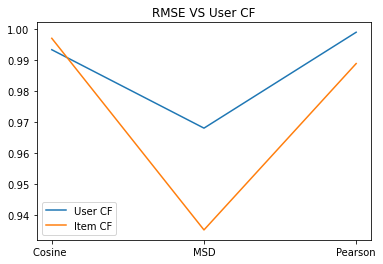

In [10]:
x_labels = ["Cosine ", "MSD", "Pearson"]
plt.title("RMSE VS User CF")
plt.plot(x_labels, model_results_ucf["rmse"])
plt.plot(x_labels, model_results_icf["rmse"])
plt.legend(["User CF", "Item CF"]);

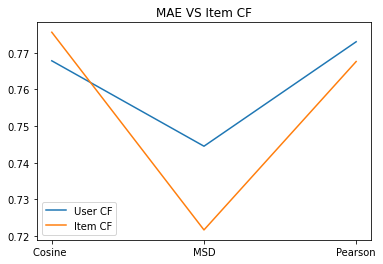

In [11]:
x_labels = ["Cosine ", "MSD", "Pearson"]
plt.title("MAE VS Item CF")
plt.plot(x_labels, model_results_ucf["mae"])
plt.plot(x_labels, model_results_icf["mae"])
plt.legend(["User CF", "Item CF"]);

### Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE.


Building User CF with K: 10 ...
Done with User CF with K: 10 ...

Building User CF with K: 15 ...
Done with User CF with K: 15 ...

Building User CF with K: 20 ...
Done with User CF with K: 20 ...

Building User CF with K: 25 ...
Done with User CF with K: 25 ...

Building User CF with K: 30 ...
Done with User CF with K: 30 ...

Building User CF with K: 35 ...
Done with User CF with K: 35 ...

Building User CF with K: 40 ...
Done with User CF with K: 40 ...

Building User CF with K: 45 ...
Done with User CF with K: 45 ...

Building User CF with K: 50 ...
Done with User CF with K: 50 ...

Building User CF with K: 55 ...
Done with User CF with K: 55 ...

Building User CF with K: 60 ...
Done with User CF with K: 60 ...

Building User CF with K: 65 ...
Done with User CF with K: 65 ...

Building User CF with K: 70 ...
Done with User CF with K: 70 ...

Building User CF with K: 75 ...
Done with User CF with K: 75 ...

Building User CF with K: 80 ...
Done with User CF with K: 80 ...

Building 

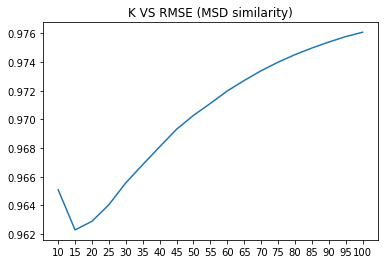

In [12]:

k_values = list(range(10, 101, 5))
model_results = []
for k in k_values:
    print("\nBuilding User CF with K:", k , "...")
    user_cf = KNNBasic(k, sim_options={'user_based':True}, verbose=False)
    model_results.append(cross_validate_model(user_cf, n_splits=5).loc["AVG"]["RMSE"])
    print("Done with User CF with K:", k , "...")
    
plt.title("K VS RMSE (MSD similarity)")
plt.xticks(k_values)
plt.plot(k_values, model_results);


In [13]:
print("Min K:", k_values[np.argmin(model_results)])

Min K: 15



Building Item CF with K: 10 ...
Done with Item CF with K: 10 ...

Building Item CF with K: 15 ...
Done with Item CF with K: 15 ...

Building Item CF with K: 20 ...
Done with Item CF with K: 20 ...

Building Item CF with K: 25 ...
Done with Item CF with K: 25 ...

Building Item CF with K: 30 ...
Done with Item CF with K: 30 ...

Building Item CF with K: 35 ...
Done with Item CF with K: 35 ...

Building Item CF with K: 40 ...
Done with Item CF with K: 40 ...

Building Item CF with K: 45 ...
Done with Item CF with K: 45 ...

Building Item CF with K: 50 ...
Done with Item CF with K: 50 ...

Building Item CF with K: 55 ...
Done with Item CF with K: 55 ...

Building Item CF with K: 60 ...
Done with Item CF with K: 60 ...

Building Item CF with K: 65 ...
Done with Item CF with K: 65 ...

Building Item CF with K: 70 ...
Done with Item CF with K: 70 ...

Building Item CF with K: 75 ...
Done with Item CF with K: 75 ...

Building Item CF with K: 80 ...
Done with Item CF with K: 80 ...

Building 

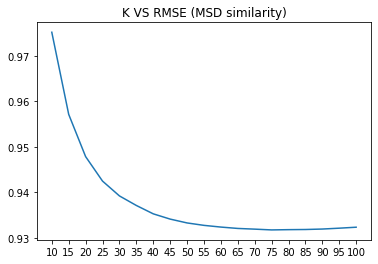

In [14]:

k_values = list(range(10, 101, 5))
model_results = []
for k in k_values:
    print("\nBuilding Item CF with K:", k , "...")
    user_cf = KNNBasic(k, sim_options={'user_based':False}, verbose=False)
    model_results.append(cross_validate_model(user_cf, n_splits=5).loc["AVG"]["RMSE"])
    print("Done with Item CF with K:", k , "...")
    
plt.title("K VS RMSE (MSD similarity)")
plt.xticks(k_values)
plt.plot(k_values, model_results);

In [15]:
print("Min K:", k_values[np.argmin(model_results)])

Min K: 75
